# Implementing a multivariate gaussian

Tomado de 
>     https://xavierbourretsicotte.github.io/MLE_Multivariate_Gaussian.html

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn-white')

In [7]:
def multivariate_gaussian_pdf(X,MU,SIGMA):
    '''Returns the pdf of a nultivariate gaussian distribution
     - X, MU are p x 1 vectors
     - SIGMA is a p x p matrix'''
    #Initialize and reshape
    X = X.reshape(-1,1)
    MU = MU.reshape(-1,1)
    p,_ = SIGMA.shape

    #Compute values
    SIGMA_inv = np.linalg.inv(SIGMA)
    denominator = np.sqrt((2 * np.pi)**p * np.linalg.det(SIGMA))
    exponent = -(1/2) * ((X - MU).T @ SIGMA_inv @ (X - MU))
    
    #Return result
    return float((1. / denominator) * np.exp(exponent) )  

# Plot the Gaussian 3D 

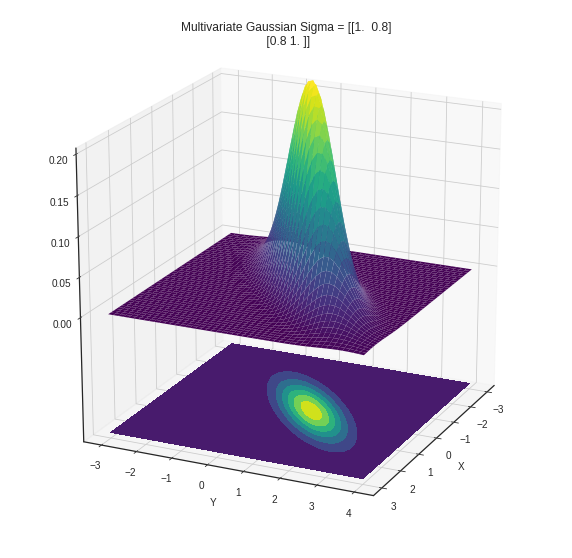

In [14]:
# Our 2-dimensional distribution will be over variables X and Y
N = 50
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.8], [0.8,  1]])

#Computing the cost function for each theta combination
zz = np.array(  [multivariate_gaussian_pdf( np.array([xx,yy]).reshape(-1,1), mu, Sigma) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
#Reshaping the cost values    
Z = zz.reshape(X.shape)

#Plot the result in 3D
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap="viridis")

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap="viridis")

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(20, 25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Multivariate Gaussian Sigma = {}'.format(Sigma))

plt.show()

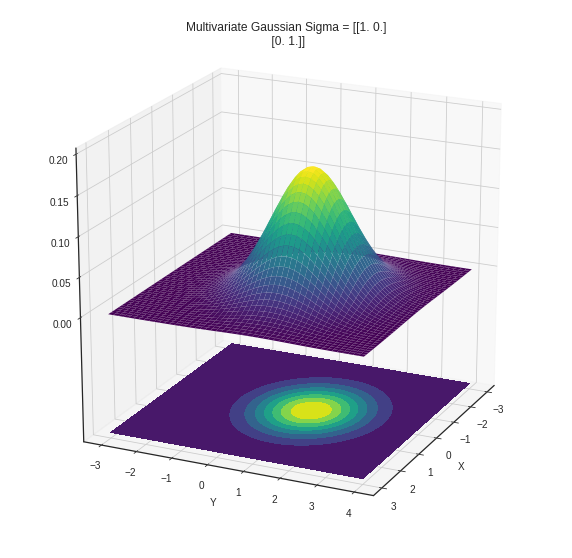

In [16]:
# Our 2-dimensional distribution will be over variables X and Y
N = 50
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.0], [0,  1]])

#Computing the cost function for each theta combination
zz = np.array(  [multivariate_gaussian_pdf( np.array([xx,yy]).reshape(-1,1), mu, Sigma) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
#Reshaping the cost values    
Z = zz.reshape(X.shape)

#Plot the result in 3D
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=True,
                cmap="viridis")

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap="viridis")

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(20, 25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Multivariate Gaussian Sigma = {}'.format(Sigma))

plt.show()
